The problem statement is to predict the probability of loan default using the given training data. This is a binary classification problem
Dependent variables description's are given in the DataDictionary.xlsx. Evaluation metric is Area Under the Curve (AUC).
This notebook is the final submitted one and hence several intermediate trials were removed

In [49]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from datetime import timedelta
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder

In [10]:
train_fin = pd.read_csv('train.csv')
print('shape of training data:', train_fin.shape)
print(train_fin.columns)

shape of training data: (233154, 41)
Index(['UniqueID', 'disbursed_amount', 'asset_cost', 'ltv', 'branch_id',
       'supplier_id', 'manufacturer_id', 'Current_pincode_ID', 'Date.of.Birth',
       'Employment.Type', 'DisbursalDate', 'State_ID', 'Employee_code_ID',
       'MobileNo_Avl_Flag', 'Aadhar_flag', 'PAN_flag', 'VoterID_flag',
       'Driving_flag', 'Passport_flag', 'PERFORM_CNS.SCORE',
       'PERFORM_CNS.SCORE.DESCRIPTION', 'PRI.NO.OF.ACCTS', 'PRI.ACTIVE.ACCTS',
       'PRI.OVERDUE.ACCTS', 'PRI.CURRENT.BALANCE', 'PRI.SANCTIONED.AMOUNT',
       'PRI.DISBURSED.AMOUNT', 'SEC.NO.OF.ACCTS', 'SEC.ACTIVE.ACCTS',
       'SEC.OVERDUE.ACCTS', 'SEC.CURRENT.BALANCE', 'SEC.SANCTIONED.AMOUNT',
       'SEC.DISBURSED.AMOUNT', 'PRIMARY.INSTAL.AMT', 'SEC.INSTAL.AMT',
       'NEW.ACCTS.IN.LAST.SIX.MONTHS', 'DELINQUENT.ACCTS.IN.LAST.SIX.MONTHS',
       'AVERAGE.ACCT.AGE', 'CREDIT.HISTORY.LENGTH', 'NO.OF_INQUIRIES',
       'loan_default'],
      dtype='object')


In [4]:
train_fin.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 233154 entries, 0 to 233153
Data columns (total 41 columns):
UniqueID                               233154 non-null int64
disbursed_amount                       233154 non-null int64
asset_cost                             233154 non-null int64
ltv                                    233154 non-null float64
branch_id                              233154 non-null int64
supplier_id                            233154 non-null int64
manufacturer_id                        233154 non-null int64
Current_pincode_ID                     233154 non-null int64
Date.of.Birth                          233154 non-null object
Employment.Type                        225493 non-null object
DisbursalDate                          233154 non-null object
State_ID                               233154 non-null int64
Employee_code_ID                       233154 non-null int64
MobileNo_Avl_Flag                      233154 non-null int64
Aadhar_flag                   

Check if any attribute as null values

In [11]:
train_fin.isnull().sum(axis=0)

UniqueID                                  0
disbursed_amount                          0
asset_cost                                0
ltv                                       0
branch_id                                 0
supplier_id                               0
manufacturer_id                           0
Current_pincode_ID                        0
Date.of.Birth                             0
Employment.Type                        7661
DisbursalDate                             0
State_ID                                  0
Employee_code_ID                          0
MobileNo_Avl_Flag                         0
Aadhar_flag                               0
PAN_flag                                  0
VoterID_flag                              0
Driving_flag                              0
Passport_flag                             0
PERFORM_CNS.SCORE                         0
PERFORM_CNS.SCORE.DESCRIPTION             0
PRI.NO.OF.ACCTS                           0
PRI.ACTIVE.ACCTS                

Except for Employment.Type all other fields do not have any nulls.
Let's check the unique values of Employmnet.Type and see what can be substituted for nulls

In [12]:
train_fin['Employment.Type'].unique()

array(['Salaried', 'Self employed', nan], dtype=object)

Will substitute null in Employment.Type marked as 'Unknown'

In [13]:
train_fin['Employment.Type'] = train_fin['Employment.Type'].fillna('Unknown')

In [14]:
train_fin.head(5)

,UniqueID,disbursed_amount,asset_cost,ltv,branch_id,supplier_id,manufacturer_id,Current_pincode_ID,Date.of.Birth,Employment.Type,...,SEC.SANCTIONED.AMOUNT,SEC.DISBURSED.AMOUNT,PRIMARY.INSTAL.AMT,SEC.INSTAL.AMT,NEW.ACCTS.IN.LAST.SIX.MONTHS,DELINQUENT.ACCTS.IN.LAST.SIX.MONTHS,AVERAGE.ACCT.AGE,CREDIT.HISTORY.LENGTH,NO.OF_INQUIRIES,loan_default
0,420825,50578,58400,89.55,67,22807,45,1441,01-01-84,Salaried,...,0,0,0,0,0,0,0yrs 0mon,0yrs 0mon,0,0
1,537409,47145,65550,73.23,67,22807,45,1502,31-07-85,Self employed,...,0,0,1991,0,0,1,1yrs 11mon,1yrs 11mon,0,1
2,417566,53278,61360,89.63,67,22807,45,1497,24-08-85,Self employed,...,0,0,0,0,0,0,0yrs 0mon,0yrs 0mon,0,0
3,624493,57513,66113,88.48,67,22807,45,1501,30-12-93,Self employed,...,0,0,31,0,0,0,0yrs 8mon,1yrs 3mon,1,1
4,539055,52378,60300,88.39,67,22807,45,1495,09-12-77,Self employed,...,0,0,0,0,0,0,0yrs 0mon,0yrs 0mon,1,1


In [15]:
len(pd.unique(train_fin['branch_id']))

82

In [16]:
len(pd.unique(train_fin['supplier_id']))

2953

In [17]:
len(pd.unique(train_fin['manufacturer_id']))

11

In [18]:
train_fin['Current_pincode_ID'].nunique()

6698

In [20]:
train_fin['State_ID'].nunique()

22

In [21]:
train_fin['Employee_code_ID'].nunique()

3270

In [22]:
train_fin['PERFORM_CNS.SCORE.DESCRIPTION']

0                               No Bureau History Available
1                                             I-Medium Risk
2                               No Bureau History Available
3                                          L-Very High Risk
4                               No Bureau History Available
5                                           A-Very Low Risk
6                               No Bureau History Available
7         Not Scored: Not Enough Info available on the c...
8                                           D-Very Low Risk
9                                           A-Very Low Risk
10                                         M-Very High Risk
11                                          B-Very Low Risk
12                                         M-Very High Risk
13                                          C-Very Low Risk
14                                         M-Very High Risk
15        Not Scored: Not Enough Info available on the c...
16                                      

In [23]:
train_fin['PERFORM_CNS.SCORE.DESCRIPTION'].unique()

array(['No Bureau History Available', 'I-Medium Risk', 'L-Very High Risk',
       'A-Very Low Risk',
       'Not Scored: Not Enough Info available on the customer',
       'D-Very Low Risk', 'M-Very High Risk', 'B-Very Low Risk',
       'C-Very Low Risk', 'E-Low Risk', 'H-Medium Risk', 'F-Low Risk',
       'K-High Risk',
       'Not Scored: No Activity seen on the customer (Inactive)',
       'Not Scored: Sufficient History Not Available',
       'Not Scored: No Updates available in last 36 months', 'G-Low Risk',
       'J-High Risk', 'Not Scored: Only a Guarantor',
       'Not Scored: More than 50 active Accounts found'], dtype=object)

In [24]:
default_cns_score = pd.crosstab(train_fin['PERFORM_CNS.SCORE.DESCRIPTION'],train_fin['loan_default'], margins=True)
default_cns_score

loan_default,0,1,All
PERFORM_CNS.SCORE.DESCRIPTION,,,
A-Very Low Risk,11783,2341,14124
B-Very Low Risk,7993,1208,9201
C-Very Low Risk,13275,2770,16045
D-Very Low Risk,9659,1699,11358
E-Low Risk,4821,1000,5821
F-Low Risk,6905,1580,8485
G-Low Risk,3202,786,3988
H-Medium Risk,5197,1658,6855
I-Medium Risk,4042,1515,5557


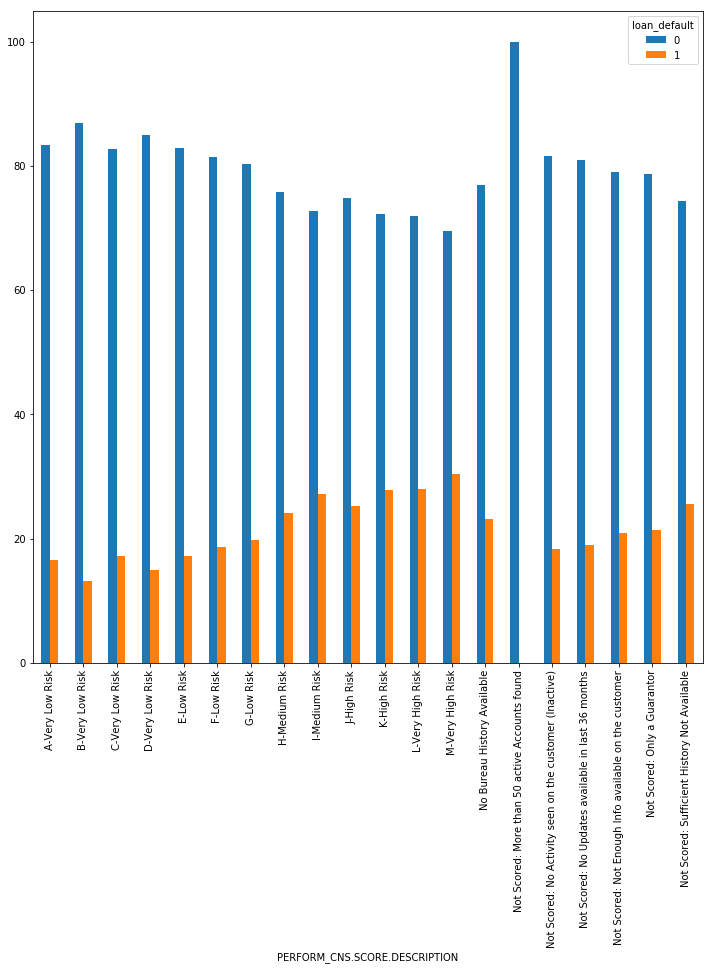

In [27]:
default_cns_score1 = pd.crosstab(train_fin['PERFORM_CNS.SCORE.DESCRIPTION'],train_fin['loan_default'])
default_cns_score1 = default_cns_score1.div(default_cns_score1.sum(1), axis=0).multiply(100)
default_cns_score1.plot.bar(figsize=(12,12))

In [28]:
train_fin['loan_default'].value_counts()

0    182543
1     50611
Name: loan_default, dtype: int64

In [29]:
train_fin[['PERFORM_CNS.SCORE','PERFORM_CNS.SCORE.DESCRIPTION']][:20]

,PERFORM_CNS.SCORE,PERFORM_CNS.SCORE.DESCRIPTION
0,0,No Bureau History Available
1,598,I-Medium Risk
2,0,No Bureau History Available
3,305,L-Very High Risk
4,0,No Bureau History Available
5,825,A-Very Low Risk
6,0,No Bureau History Available
7,17,Not Scored: Not Enough Info available on the c...
8,718,D-Very Low Risk
9,818,A-Very Low Risk


It can be noticed that PERFORM_CNS.SCORE and PERFORM_CNS.SCORE.DESCRIPTION are closely related. A,B,C,D are Very low risk with score > 700. E,F,G being Low Risk etc.

In [31]:
train_fin['MobileNo_Avl_Flag'].value_counts()

1    233154
Name: MobileNo_Avl_Flag, dtype: int64

In [32]:
train_fin['Aadhar_flag'].value_counts()

1    195924
0     37230
Name: Aadhar_flag, dtype: int64

In [33]:
train_fin['VoterID_flag'].value_counts()

0    199360
1     33794
Name: VoterID_flag, dtype: int64

In [34]:
train_fin['PAN_flag'].value_counts()

0    215533
1     17621
Name: PAN_flag, dtype: int64

Applicant's age is not given. However, it can be derived using the Date of Birth and Disbursal Date

In [35]:
train_fin['appl_age'] = round((pd.to_datetime(train_fin['DisbursalDate']) - pd.to_datetime(train_fin['Date.of.Birth']))/timedelta(365))

In [36]:
train_fin['AVERAGE.ACCT.AGE'][:5]

0     0yrs 0mon
1    1yrs 11mon
2     0yrs 0mon
3     0yrs 8mon
4     0yrs 0mon
Name: AVERAGE.ACCT.AGE, dtype: object

Converting the average account age and average credit age into months

In [38]:
train_fin['AVERAGE_ACCT_AGE_MON_TUP'] =  train_fin['AVERAGE.ACCT.AGE'].str.findall(r'([0-9]*)yrs ([0-9]*)mon')
train_fin['AVERAGE_ACCT_AGE_MON_TUP1'] = pd.Series([y for x in train_fin['AVERAGE_ACCT_AGE_MON_TUP'] for y in x])
train_fin['yrs_acct_age'] = pd.Series([x[0] for x in train_fin['AVERAGE_ACCT_AGE_MON_TUP1']])
train_fin['mon_acct_age'] = pd.Series([x[1] for x in train_fin['AVERAGE_ACCT_AGE_MON_TUP1']])
train_fin['acct_age_months'] = pd.to_numeric(train_fin['yrs_acct_age'])*12 + pd.to_numeric(train_fin['mon_acct_age'])
train_fin['acct_age_months'][:5]

0     0
1    23
2     0
3     8
4     0
Name: acct_age_months, dtype: int64

In [39]:
train_fin['CREDIT_HIST_TUP'] =  train_fin['CREDIT.HISTORY.LENGTH'].str.findall(r'([0-9]*)yrs ([0-9]*)mon')
train_fin['CREDIT_HIST_TUP1'] = pd.Series([y for x in train_fin['CREDIT_HIST_TUP'] for y in x])
train_fin['credit_yrs_age'] = pd.Series([x[0] for x in train_fin['CREDIT_HIST_TUP1']])
train_fin['credit_mon_age'] = pd.Series([x[1] for x in train_fin['CREDIT_HIST_TUP1']])
train_fin['credit_age_months'] = pd.to_numeric(train_fin['credit_yrs_age'])*12 + pd.to_numeric(train_fin['credit_mon_age'])
train_fin['credit_age_months'][:5]

0     0
1    23
2     0
3    15
4     0
Name: credit_age_months, dtype: int64

Exclude the ID columns and get the rest as training data set to try with.
Building a simple logistic regression model to start with to get an idea

In [94]:
train_x = train_fin[['disbursed_amount','asset_cost','ltv','appl_age','Employment.Type','Aadhar_flag','VoterID_flag','PAN_flag','Driving_flag','Passport_flag',
                     'PERFORM_CNS.SCORE','PRI.NO.OF.ACCTS', 'PRI.ACTIVE.ACCTS',
       'PRI.OVERDUE.ACCTS', 'PRI.CURRENT.BALANCE', 'PRI.SANCTIONED.AMOUNT',
       'PRI.DISBURSED.AMOUNT', 'SEC.NO.OF.ACCTS', 'SEC.ACTIVE.ACCTS',
       'SEC.OVERDUE.ACCTS', 'SEC.CURRENT.BALANCE', 'SEC.SANCTIONED.AMOUNT',
       'SEC.DISBURSED.AMOUNT', 'PRIMARY.INSTAL.AMT', 'SEC.INSTAL.AMT',
       'NEW.ACCTS.IN.LAST.SIX.MONTHS', 'DELINQUENT.ACCTS.IN.LAST.SIX.MONTHS','NO.OF_INQUIRIES']]

In [42]:
train_y = train_fin['loan_default']

In [96]:
onehot_enc = OneHotEncoder(sparse=False, categories='auto')
onehot_encoded = onehot_enc.fit_transform(train_x['Employment.Type'].values.reshape(-1,1))

In [97]:
train_x = pd.concat([train_x, pd.DataFrame(data=onehot_encoded, columns=['Salaried', 'Self_Employed', 'Unknown'])], axis=1)

In [98]:
#Drop the Employment.Type column
train_x.drop(['Employment.Type'], axis=1, inplace=True)

Using the Logit from statsmodels so that we can check the significance of variables using p-value
LogisticRegression method does not give us the variable significance. This is unlike in R where the model summary gives us the variable significance

In [65]:
from statsmodels import api as sm
logit_model = sm.Logit(train_y,train_x)
result = logit_model.fit()

Optimization terminated successfully.
         Current function value: 0.508599
         Iterations 6


In [66]:
result.summary2()

<class 'statsmodels.iolib.summary2.Summary'>
"""
                                   Results: Logit
====================================================================================
Model:                    Logit                  Pseudo R-squared:       0.028      
Dependent Variable:       loan_default           AIC:                    237223.6192
Date:                     2019-04-22 22:47       BIC:                    237534.4028
No. Observations:         233154                 Log-Likelihood:         -1.1858e+05
Df Model:                 29                     LL-Null:                -1.2198e+05
Df Residuals:             233124                 LLR p-value:            0.0000     
Converged:                1.0000                 Scale:                  1.0000     
No. Iterations:           6.0000                                                    
------------------------------------------------------------------------------------
                                     Coef.  Std.Err.    z     P>|z|   [0.025  0.975]
------------------------------------------------------------------------------------
disbursed_amount                    -0.0000   0.0000  -2.7227 0.0065 -0.0000 -0.0000
asset_cost                           0.0000   0.0000   6.9233 0.0000  0.0000  0.0000
ltv                                  0.0343   0.0018  19.2324 0.0000  0.0308  0.0378
appl_age                             0.0008   0.0002   3.6678 0.0002  0.0004  0.0013
Aadhar_flag                         -0.3202   0.0396  -8.0761 0.0000 -0.3979 -0.2425
VoterID_flag                         0.0116   0.0391   0.2960 0.7672 -0.0650  0.0881
PAN_flag                            -0.0495   0.0198  -2.4975 0.0125 -0.0884 -0.0107
Driving_flag                        -0.2692   0.0475  -5.6644 0.0000 -0.3624 -0.1761
Passport_flag                       -0.6663   0.1323  -5.0350 0.0000 -0.9257 -0.4069
PERFORM_CNS.SCORE                   -0.0003   0.0000 -18.1487 0.0000 -0.0004 -0.0003
PRI.NO.OF.ACCTS                     -0.0125   0.0019  -6.5652 0.0000 -0.0162 -0.0087
PRI.ACTIVE.ACCTS                    -0.0762   0.0066 -11.5091 0.0000 -0.0892 -0.0632
PRI.OVERDUE.ACCTS                    0.2263   0.0109  20.6722 0.0000  0.2049  0.2478
PRI.CURRENT.BALANCE                 -0.0000   0.0000 -10.3987 0.0000 -0.0000 -0.0000
PRI.SANCTIONED.AMOUNT               -0.0000   0.0000  -0.7413 0.4585 -0.0000  0.0000
PRI.DISBURSED.AMOUNT                 0.0000   0.0000   0.7761 0.4377 -0.0000  0.0000
SEC.NO.OF.ACCTS                     -0.0416   0.0184  -2.2654 0.0235 -0.0776 -0.0056
SEC.ACTIVE.ACCTS                     0.0374   0.0370   1.0114 0.3118 -0.0351  0.1100
SEC.OVERDUE.ACCTS                   -0.0069   0.0571  -0.1209 0.9038 -0.1189  0.1051
SEC.CURRENT.BALANCE                 -0.0000   0.0000  -0.0948 0.9245 -0.0000  0.0000
SEC.SANCTIONED.AMOUNT               -0.0000   0.0000  -1.5672 0.1171 -0.0000  0.0000
SEC.DISBURSED.AMOUNT                 0.0000   0.0000   1.4956 0.1348 -0.0000  0.0000
PRIMARY.INSTAL.AMT                   0.0000   0.0000   0.6122 0.5404 -0.0000  0.0000
SEC.INSTAL.AMT                       0.0000   0.0000   1.0676 0.2857 -0.0000  0.0000
NEW.ACCTS.IN.LAST.SIX.MONTHS         0.0237   0.0090   2.6300 0.0085  0.0060  0.0413
DELINQUENT.ACCTS.IN.LAST.SIX.MONTHS  0.2935   0.0152  19.3021 0.0000  0.2637  0.3233
NO.OF_INQUIRIES                      0.1530   0.0070  21.9256 0.0000  0.1393  0.1667
Salaried                            -4.0750   0.1348 -30.2350 0.0000 -4.3392 -3.8109
Self_Employed                       -3.9096   0.1345 -29.0654 0.0000 -4.1733 -3.6460
Unknown                             -3.9991   0.1370 -29.1993 0.0000 -4.2675 -3.7307
====================================================================================

"""

In [68]:
from warnings import simplefilter
simplefilter(action='ignore', category='FutureWarning')

In [72]:
from sklearn.linear_model import LogisticRegression
log_reg = LogisticRegression(solver='liblinear')
log_reg_model = log_reg.fit(train_x, train_y)

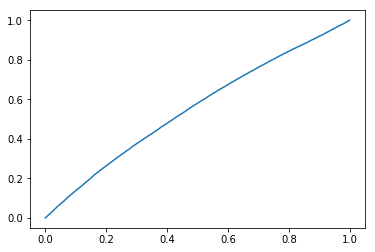

In [73]:
from sklearn import metrics
train_pred_prob = log_reg_model.predict_proba(train_x)

fpr, tpr, thresh = metrics.roc_curve(train_y, train_pred_prob[:,1])
plt.plot(fpr, tpr)

In [74]:
test_fin = pd.read_csv('test.csv')

In [75]:
test_fin.isnull().sum(axis = 0)

UniqueID                                  0
disbursed_amount                          0
asset_cost                                0
ltv                                       0
branch_id                                 0
supplier_id                               0
manufacturer_id                           0
Current_pincode_ID                        0
Date.of.Birth                             0
Employment.Type                        3443
DisbursalDate                             0
State_ID                                  0
Employee_code_ID                          0
MobileNo_Avl_Flag                         0
Aadhar_flag                               0
PAN_flag                                  0
VoterID_flag                              0
Driving_flag                              0
Passport_flag                             0
PERFORM_CNS.SCORE                         0
PERFORM_CNS.SCORE.DESCRIPTION             0
PRI.NO.OF.ACCTS                           0
PRI.ACTIVE.ACCTS                

In [76]:
test_fin['appl_age'] = round((pd.to_datetime(test_fin['DisbursalDate']) - pd.to_datetime(test_fin['Date.of.Birth']))/timedelta(365))

In [77]:
test_fin['Employment.Type'] = test_fin['Employment.Type'].fillna('Unknown')

In [99]:
test_x = test_fin[['disbursed_amount','asset_cost','ltv','appl_age','Employment.Type','Aadhar_flag','VoterID_flag','PAN_flag','Driving_flag','Passport_flag',
                     'PERFORM_CNS.SCORE','PRI.NO.OF.ACCTS', 'PRI.ACTIVE.ACCTS',
       'PRI.OVERDUE.ACCTS', 'PRI.CURRENT.BALANCE', 'PRI.SANCTIONED.AMOUNT',
       'PRI.DISBURSED.AMOUNT', 'SEC.NO.OF.ACCTS', 'SEC.ACTIVE.ACCTS',
       'SEC.OVERDUE.ACCTS', 'SEC.CURRENT.BALANCE', 'SEC.SANCTIONED.AMOUNT',
       'SEC.DISBURSED.AMOUNT', 'PRIMARY.INSTAL.AMT', 'SEC.INSTAL.AMT',
       'NEW.ACCTS.IN.LAST.SIX.MONTHS', 'DELINQUENT.ACCTS.IN.LAST.SIX.MONTHS','NO.OF_INQUIRIES']]

In [100]:
onehot_encoded_test = onehot_enc.transform(test_x['Employment.Type'].values.reshape(-1,1))

In [101]:
test_x = pd.concat([test_x, pd.DataFrame(data=onehot_encoded_test, columns=['Salaried', 'Self_Employed', 'Unknown'])], axis=1)

In [102]:
test_x = test_x.drop(['Employment.Type'], axis=1)

Feature Engineering:
Creating new features from existing features to improve the predictive power in the data

In [104]:
train_x['percent_od_6m'] = np.where(train_x['DELINQUENT.ACCTS.IN.LAST.SIX.MONTHS'] == 0,0,train_x['PRI.OVERDUE.ACCTS']/train_x['DELINQUENT.ACCTS.IN.LAST.SIX.MONTHS']) 
train_x['percent_od_acc'] = np.where(train_x['PRI.OVERDUE.ACCTS'] == 0,0,train_x['PRI.NO.OF.ACCTS']/train_x['PRI.OVERDUE.ACCTS']) 
train_x['loan_value'] = train_x['ltv']*train_x['asset_cost']/100
train_x['pri_paid_perc_so_far'] = np.where((train_fin['PRI.DISBURSED.AMOUNT']-train_fin['PRI.CURRENT.BALANCE']) > 0, train_fin['PRI.DISBURSED.AMOUNT']/(train_fin['PRI.DISBURSED.AMOUNT']-train_fin['PRI.CURRENT.BALANCE']),1)
train_x['pri_disb_percent_sanc'] = np.where(train_fin['PRI.DISBURSED.AMOUNT']>0,train_fin['PRI.SANCTIONED.AMOUNT']/train_fin['PRI.DISBURSED.AMOUNT'],1)
train_x['avg_loan_per_acc_curr_bal'] = np.where(train_fin['PRI.ACTIVE.ACCTS']>0,train_fin['PRI.CURRENT.BALANCE']/train_fin['PRI.ACTIVE.ACCTS'],0)
train_x['overdue_acct_ratio'] = np.where(train_fin['PRI.OVERDUE.ACCTS'] > 0, train_fin['PRI.NO.OF.ACCTS']/train_fin['PRI.OVERDUE.ACCTS'],0)
train_x['is_pri_sec_overdue_with_pri_active'] = np.where((train_fin['PRI.OVERDUE.ACCTS'] > 0) & (train_fin['SEC.OVERDUE.ACCTS'] > 0) & (train_fin['PRI.ACTIVE.ACCTS'] > 0),1,0)
train_x['months_to_pay_pri'] = np.where(train_fin['PRIMARY.INSTAL.AMT'] > 0, train_fin['PRI.CURRENT.BALANCE']/train_fin['PRIMARY.INSTAL.AMT'],0)
train_x['sec_ovedue_acct_ratio'] = np.where(train_fin['SEC.OVERDUE.ACCTS']>0,train_fin['SEC.NO.OF.ACCTS']/train_fin['SEC.OVERDUE.ACCTS'],0)
train_x['is_pri_sec_overdue'] = np.where((train_fin['PRI.OVERDUE.ACCTS'] > 0) & (train_fin['SEC.OVERDUE.ACCTS'] > 0),1, 0)
train_x['self_value_emi_months'] = np.where(train_fin['PRIMARY.INSTAL.AMT']>0,((100-train_fin['ltv'])*(train_fin['asset_cost'])/100),0)
train_x['self_value'] = train_x['asset_cost']-(train_x['asset_cost']*train_x['ltv']/100)
train_x['percent_accts_default_6_mon'] = np.where(train_fin['DELINQUENT.ACCTS.IN.LAST.SIX.MONTHS']>0,train_fin['PRI.OVERDUE.ACCTS']/train_fin['DELINQUENT.ACCTS.IN.LAST.SIX.MONTHS'],0)

In [105]:
test_x['percent_od_6m'] = np.where(test_x['DELINQUENT.ACCTS.IN.LAST.SIX.MONTHS'] == 0,0,test_x['PRI.OVERDUE.ACCTS']/test_x['DELINQUENT.ACCTS.IN.LAST.SIX.MONTHS']) 
test_x['percent_od_acc'] = np.where(test_x['PRI.OVERDUE.ACCTS'] == 0,0,test_x['PRI.NO.OF.ACCTS']/test_x['PRI.OVERDUE.ACCTS']) 
test_x['loan_value'] = test_x['ltv']*test_x['asset_cost']/100
test_x['pri_paid_perc_so_far'] = np.where((test_fin['PRI.DISBURSED.AMOUNT']-test_fin['PRI.CURRENT.BALANCE']) > 0, test_fin['PRI.DISBURSED.AMOUNT']/(test_fin['PRI.DISBURSED.AMOUNT']-test_fin['PRI.CURRENT.BALANCE']),1)
test_x['pri_disb_percent_sanc'] = np.where(test_fin['PRI.DISBURSED.AMOUNT']>0,test_fin['PRI.SANCTIONED.AMOUNT']/test_fin['PRI.DISBURSED.AMOUNT'],1)
test_x['avg_loan_per_acc_curr_bal'] = np.where(test_fin['PRI.ACTIVE.ACCTS']>0,test_fin['PRI.CURRENT.BALANCE']/test_fin['PRI.ACTIVE.ACCTS'],0)
test_x['overdue_acct_ratio'] = np.where(test_fin['PRI.OVERDUE.ACCTS'] > 0, test_fin['PRI.NO.OF.ACCTS']/test_fin['PRI.OVERDUE.ACCTS'],0)
test_x['is_pri_sec_overdue_with_pri_active'] = np.where((test_fin['PRI.OVERDUE.ACCTS'] > 0) & (test_fin['SEC.OVERDUE.ACCTS'] > 0) & (test_fin['PRI.ACTIVE.ACCTS'] > 0),1,0)
test_x['months_to_pay_pri'] = np.where(test_fin['PRIMARY.INSTAL.AMT'] > 0, test_fin['PRI.CURRENT.BALANCE']/test_fin['PRIMARY.INSTAL.AMT'],0)
test_x['sec_ovedue_acct_ratio'] = np.where(test_fin['SEC.OVERDUE.ACCTS']>0,test_fin['SEC.NO.OF.ACCTS']/test_fin['SEC.OVERDUE.ACCTS'],0)
test_x['is_pri_sec_overdue'] = np.where((test_fin['PRI.OVERDUE.ACCTS'] > 0) & (test_fin['SEC.OVERDUE.ACCTS'] > 0),1, 0)
test_x['self_value_emi_months'] = np.where(test_fin['PRIMARY.INSTAL.AMT']>0,((100-test_fin['ltv'])*(test_fin['asset_cost'])/100),0)
test_x['self_value'] = test_x['asset_cost']-(test_x['asset_cost']*test_x['ltv']/100)
test_x['percent_accts_default_6_mon'] = np.where(test_fin['DELINQUENT.ACCTS.IN.LAST.SIX.MONTHS']>0,test_fin['PRI.OVERDUE.ACCTS']/test_fin['DELINQUENT.ACCTS.IN.LAST.SIX.MONTHS'],0)

In [89]:
mask = np.random.choice([False, True], len(train_x), p=[0.7, 0.3])
not_mask = ~mask

In [106]:
import xgboost as xgb

xg_train1 = xgb.DMatrix(train_x[not_mask], label=train_y[not_mask],feature_names=train_x.columns)
xg_val1 = xgb.DMatrix(train_x[mask], label=train_y[mask],feature_names=train_x.columns)

param = {}
param['objective'] = 'binary:logistic'
param['eta'] = 0.01
param['max_depth'] = 6
param['silent'] = 1
param['eval_metric'] = "auc"
param['subsample'] = 0.5
param['colsample_bytree'] = 0.5

evallist1  = [(xg_val1, 'eval')]
bst1 = xgb.train( param, xg_train1, 1000, evallist1 )

[0]	eval-auc:0.606945
[1]	eval-auc:0.611537
[2]	eval-auc:0.620664
[3]	eval-auc:0.622099
[4]	eval-auc:0.624618
[5]	eval-auc:0.625459
[6]	eval-auc:0.625923
[7]	eval-auc:0.626623
[8]	eval-auc:0.627143
[9]	eval-auc:0.627411
[10]	eval-auc:0.627792
[11]	eval-auc:0.62782
[12]	eval-auc:0.628071
[13]	eval-auc:0.628044
[14]	eval-auc:0.628235
[15]	eval-auc:0.628603
[16]	eval-auc:0.62874
[17]	eval-auc:0.628993
[18]	eval-auc:0.629334
[19]	eval-auc:0.629566
[20]	eval-auc:0.629565
[21]	eval-auc:0.629446
[22]	eval-auc:0.629651
[23]	eval-auc:0.629753
[24]	eval-auc:0.629923
[25]	eval-auc:0.630155
[26]	eval-auc:0.630036
[27]	eval-auc:0.630145
[28]	eval-auc:0.63008
[29]	eval-auc:0.630086
[30]	eval-auc:0.630136
[31]	eval-auc:0.630511
[32]	eval-auc:0.630527
[33]	eval-auc:0.6304
[34]	eval-auc:0.630398
[35]	eval-auc:0.630607
[36]	eval-auc:0.630443
[37]	eval-auc:0.630833
[38]	eval-auc:0.630827
[39]	eval-auc:0.630823
[40]	eval-auc:0.630809
[41]	eval-auc:0.631176
[42]	eval-auc:0.631189
[43]	eval-auc:0.631178
[44

[348]	eval-auc:0.638216
[349]	eval-auc:0.638226
[350]	eval-auc:0.638234
[351]	eval-auc:0.638249
[352]	eval-auc:0.638259
[353]	eval-auc:0.638277
[354]	eval-auc:0.638293
[355]	eval-auc:0.638332
[356]	eval-auc:0.638364
[357]	eval-auc:0.638361
[358]	eval-auc:0.638371
[359]	eval-auc:0.638374
[360]	eval-auc:0.638398
[361]	eval-auc:0.638392
[362]	eval-auc:0.638411
[363]	eval-auc:0.638422
[364]	eval-auc:0.638441
[365]	eval-auc:0.638463
[366]	eval-auc:0.638472
[367]	eval-auc:0.638478
[368]	eval-auc:0.638497
[369]	eval-auc:0.638519
[370]	eval-auc:0.638519
[371]	eval-auc:0.638543
[372]	eval-auc:0.638552
[373]	eval-auc:0.638548
[374]	eval-auc:0.638551
[375]	eval-auc:0.638549
[376]	eval-auc:0.638561
[377]	eval-auc:0.638571
[378]	eval-auc:0.638582
[379]	eval-auc:0.638593
[380]	eval-auc:0.63861
[381]	eval-auc:0.638624
[382]	eval-auc:0.638627
[383]	eval-auc:0.638629
[384]	eval-auc:0.638656
[385]	eval-auc:0.638656
[386]	eval-auc:0.638652
[387]	eval-auc:0.63865
[388]	eval-auc:0.638667
[389]	eval-auc:0.6

[691]	eval-auc:0.640766
[692]	eval-auc:0.640767
[693]	eval-auc:0.640768
[694]	eval-auc:0.640778
[695]	eval-auc:0.640779
[696]	eval-auc:0.64078
[697]	eval-auc:0.640777
[698]	eval-auc:0.640781
[699]	eval-auc:0.640775
[700]	eval-auc:0.640779
[701]	eval-auc:0.640779
[702]	eval-auc:0.640776
[703]	eval-auc:0.640782
[704]	eval-auc:0.640784
[705]	eval-auc:0.640769
[706]	eval-auc:0.640769
[707]	eval-auc:0.640783
[708]	eval-auc:0.640777
[709]	eval-auc:0.640776
[710]	eval-auc:0.640777
[711]	eval-auc:0.640789
[712]	eval-auc:0.64079
[713]	eval-auc:0.640795
[714]	eval-auc:0.640795
[715]	eval-auc:0.640787
[716]	eval-auc:0.640796
[717]	eval-auc:0.640793
[718]	eval-auc:0.640786
[719]	eval-auc:0.640801
[720]	eval-auc:0.640821
[721]	eval-auc:0.640829
[722]	eval-auc:0.640835
[723]	eval-auc:0.640838
[724]	eval-auc:0.640858
[725]	eval-auc:0.64086
[726]	eval-auc:0.640863
[727]	eval-auc:0.640866
[728]	eval-auc:0.64087
[729]	eval-auc:0.640868
[730]	eval-auc:0.640874
[731]	eval-auc:0.64087
[732]	eval-auc:0.6408

In [107]:
xg_test = xgb.DMatrix(test_x,feature_names=test_x.columns)
pred_xgb = bst1.predict(xg_test)

In [108]:
test_fin2 = test_fin
test_fin2['xgb_pred_prob'] = pred_xgb

In [110]:
import lightgbm as lgb
rounds = 1000
early_stop_rounds = 100
lgbm_params = {
    'boosting_type': 'gbdt',
    'objective': 'binary',
    'metric' : 'auc',
    'num_leaves' : 255,
    'max_depth': 12,
    'learning_rate' : 0.01,
    'feature_fraction' : 0.5,
    'verbosity' : 0,
    'min_data_in_leaf' : 10,
    'lambda_l1' : 0.1,
    'lambda_l2' : 0.1,
    'scale_pos_weight' : 1
}

In [111]:
X_train = lgb.Dataset(train_x[not_mask],train_y[not_mask],feature_name=train_x.columns.tolist())
X_test = lgb.Dataset(train_x[mask],train_y[mask],feature_name=train_x.columns.tolist())

In [112]:
model_lgb = lgb.train(lgbm_params,X_train,num_boost_round=rounds,valid_sets=[X_train,X_test],valid_names=['train','valid'],
                    early_stopping_rounds=early_stop_rounds,verbose_eval=1000)

Training until validation scores don't improve for 100 rounds.
Early stopping, best iteration is:
[482]	train's auc: 0.766732	valid's auc: 0.641134


In [113]:
X_test_act = lgb.Dataset(test_x,feature_name=test_x.columns.tolist())
lgb_pred_prob = model_lgb.predict(test_x.loc[:,test_x.columns.tolist()])
test_fin2['lgb_pred_prob'] = lgb_pred_prob

Among these XGBoost prediction has given the better auc score
On public leaderboard, gave auc score of 0.6352 and on private leaderboard, it is 0.6390

Thank you Analytics Vidhya for the hackathon